### Libraries

In [50]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Data Import

In [2]:
df_purchase = pd.read_csv('dataset/purchase_data.csv')

### Data Exploration

In [5]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


### Data Segmentation

#### Import Segmentation Model 

In [7]:
scaler = pickle.load(open('dataset/scaler.pickle','rb'))

In [9]:
pca = pickle.load(open('dataset/pca.pickle', 'rb'))

In [11]:
kmeans_pca = pickle.load(open('dataset/kmeans_pca.pickle','rb'))

In [12]:
kmeans_pca

KMeans(n_clusters=4, random_state=42)

### Standardization

In [14]:
features = df_purchase[['Sex','Marital status', 'Age','Education', 'Income','Occupation', 'Settlement size']]

In [16]:
df_purchase_segm_std = scaler.transform(features)

### PCA

In [20]:
df_purcchase_segm_pca = pca.transform(df_purchase_segm_std)

### K-means PCA

In [22]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purcchase_segm_pca)

In [30]:
df_purchase_predictors = df_purchase.copy()

In [31]:
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

### Descriptive Analysis by Segments

### Data Analysis by customer

In [35]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


In [39]:
temp1 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence':'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [43]:
temp2 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence':'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [44]:
temp3['Average_N_Purchase'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchase
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [45]:
temp4 = df_purchase_predictors[['ID','Segment']].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)

In [46]:
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchase,Segment
ID,,,,
200000001,101,9,0.089109,0
200000002,87,11,0.126437,3
200000003,97,10,0.103093,0
200000004,85,11,0.129412,0
200000005,111,13,0.117117,1


### Segment Proportions

In [48]:
segm_prop = df_purchase_descr[['N_Purchases', 'Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchase':'Segment Proportions'})
segm_prop

,N_Purchases
Segment,
0,0.378
1,0.222
2,0.206
3,0.194


Text(0.5, 1.0, 'Segment Proportions')

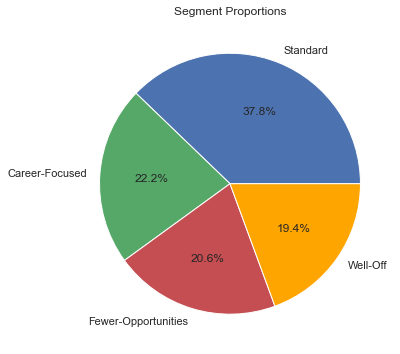

In [52]:
plt.figure(figsize=(9,6))
plt.pie(segm_prop['N_Purchases'], 
        labels = ['Standard', 'Career-Focused', 'Fewer-Opportunities','Well-Off'], 
        autopct = '%1.1f%%', 
        colors = ('b', 'g','r','orange'))
plt.title('Segment Proportions')